#<h1><strong>Wild Fire Prediction Challenge Zindi Challenge</strong></h1>

# Libralies used for the whole project

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GroupKFold, KFold, train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from statistics import mean
from tqdm import tqdm_notebook
import datetime
import warnings
warnings.filterwarnings('ignore')


# Loading CSV Files

In [25]:
# Read the data
train = pd.read_csv('https://raw.githubusercontent.com/Yousifshaheen/PlayData/main/Train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Yousifshaheen/PlayData/main/Test.csv')
ss = pd.read_csv('https://raw.githubusercontent.com/Yousifshaheen/PlayData/main/SampleSubmission.csv')
varicable_definition = pd.read_csv('https://raw.githubusercontent.com/Yousifshaheen/PlayData/main/variable_definitions.csv')

In [26]:
train.shape, test.shape

((83148, 29), (25584, 28))

In [27]:
train.shape

(83148, 29)

`train[(train['burn_area'] != 0) & (train['year'] == 2001)]` is 1346



In [28]:
varicable_definition

,Variable,Description
0,ID,The IDs take the form of [area ID]_yyyy-mm-dd....
1,area,Area ID
2,date,The date that the data is aggregated over
3,lat,Latitude of the center of the area
4,lon,Longitude of the center of the area
5,burn_area,Percentage of the area burnt
6,climate_aet,"Actual evapotranspiration, derived using a one..."
7,climate_def,"Climate water deficit, derived using a one-dim..."
8,climate_pdsi,Palmer Drought Severity Index
9,climate_pet,Reference evapotranspiration (ASCE Penman-Mont...


# <h1><strong>Checking the distribution of data, outliers, null values and more<strong><h1>

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83148 entries, 0 to 83147
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             83148 non-null  object 
 1   lat            83148 non-null  float64
 2   lon            83148 non-null  float64
 3   burn_area      83148 non-null  float64
 4   climate_aet    83148 non-null  int64  
 5   climate_def    83148 non-null  int64  
 6   climate_pdsi   83148 non-null  int64  
 7   climate_pet    83148 non-null  int64  
 8   climate_pr     83148 non-null  int64  
 9   climate_ro     83148 non-null  int64  
 10  climate_soil   83148 non-null  int64  
 11  climate_srad   83148 non-null  int64  
 12  climate_swe    83148 non-null  int64  
 13  climate_tmmn   83148 non-null  int64  
 14  climate_tmmx   83148 non-null  int64  
 15  climate_vap    83148 non-null  int64  
 16  climate_vpd    83148 non-null  int64  
 17  climate_vs     83148 non-null  int64  
 18  elevat

In [30]:
train.isnull().sum()/len(train)*100

,0
ID,0.0
lat,0.0
lon,0.0
burn_area,0.0
climate_aet,0.0
climate_def,0.0
climate_pdsi,0.0
climate_pet,0.0
climate_pr,0.0
climate_ro,0.0


In [31]:
train.describe()

,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,...,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation
count,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,...,83148.000000,83148.000000,83148.000000,8.314800e+04,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000
mean,-19.014557,29.860856,0.007632,484.491124,828.892721,-30.806237,1313.382992,54.576322,6.215134,305.477919,...,0.006158,0.000017,0.008583,4.066313e-08,0.160628,0.037453,0.785382,0.000354,0.001424,0.078551
std,1.588444,1.751090,0.029226,470.467480,546.934469,235.802930,315.209838,71.997561,21.480399,400.956123,...,0.053111,0.000141,0.059046,3.535121e-06,0.192957,0.106050,0.233953,0.001773,0.014233,0.104464
min,-22.358835,25.487029,0.000000,0.000000,0.000000,-563.000000,587.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000
25%,-20.358835,28.487029,0.000000,50.000000,375.000000,-212.000000,1081.000000,1.000000,0.000000,70.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.014993,0.000000,0.655322,0.000000,0.000000,0.002017
50%,-18.858835,29.987029,0.000000,302.000000,858.000000,-108.000000,1290.000000,22.000000,1.000000,149.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.076706,0.000139,0.880600,0.000000,0.000000,0.028503
75%,-17.858835,31.237029,0.000000,931.000000,1211.000000,142.000000,1517.000000,87.000000,4.000000,329.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.246498,0.015166,0.971209,0.000000,0.000000,0.125500
max,-15.858835,32.987029,0.843886,1713.000000,2614.000000,851.000000,2620.000000,501.000000,342.000000,3319.000000,...,0.828131,0.004918,0.711603,3.073689e-04,0.981472,0.881323,1.000000,0.016708,0.301823,0.801328


<h1><strong>Ploting Boxplots<strong></h1>

In [32]:
plt.figure(figsize=(20,15))
for i in range (len(train.columns)):
  plt.subplot(6,5,i+1)
  sns.boxplot(y=train[train.columns[i]], data=train)
  plt.title(train.columns[i])
plt.tight_layout()
plt.show();

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7c3e590193f0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7c3e59018670> (for post_execute):


KeyboardInterrupt: 

As we can see, our data is not normalised and it has many outliers

# <h1><strong>Featurre Engineering<strong></h1>


*   Adding new columns based on the preexisting columns
*   Checking the relationships of the columns



In [34]:
# Split the ID (eg 127_2017-01-03) to get the date string, which we convert to datetime to make life easier
train['date'] = pd.to_datetime(train['ID'].apply(lambda x: x.split('_')[1]))
test['date'] = pd.to_datetime(test['ID'].apply(lambda x: x.split('_')[1]))

In [35]:
def teampreture_features(df):
  # convert fahrenheit to clsius - maximun, minumum
  df['minimum_teampreture_in_clsius'] = (df['climate_tmmn'] - 32) * (5/9)
  df['maximum_teampreture_in_clsius'] = (df['climate_tmmx'] - 32) * (5/9)

  # calculate the teampreture mean
  df['climate_tm_mean'] = (df['climate_tmmn'] + df['climate_tmmx']) / 2
  # calculate the teampreture mean - in clsius
  df['climate_tm_mean_in_clsius'] = (df['climate_tm_mean'] - 32) * (5/9)

  # convert mean to clsius
  df['climate_tm_mean'] = (df['climate_tmmx'] - df['climate_tmmn']) / 2

  # Calculate max, min teampreture anomaly (difference from mean)
  df['climate_tmmn_from_mean'] = abs(df['climate_tmmn'] - df['climate_tm_mean'])
  df['climate_tmmx_from_mean'] = abs(df['climate_tmmx'] - df['climate_tm_mean'])

  # convert the difference from mean to clsius
  df['climate_tmmn_from_mean'] = (df['climate_tmmn_from_mean'] - 32) * (5/9)


  # Temperature Precipitation Interaction
  df['Elevation-Temperature Interaction'] = df['elevation'] * df['climate_tm_mean']
  # Heat Index -  Feature: Approximation of the heat index using temperature and precipitation.
  df['Heat_Index'] = df['climate_tm_mean'] + 0.1 * df['precipitation']
  df['precip_intensity'] = 1 / (df['precipitation'] + 1e-5)
  # Temperature Range:
  df['Temperature_Range'] = df['climate_tmmx'] - df['climate_tmmn']
  # Radiation-Temperature Interaction:
  df['Radiation_Temperature_Interaction'] = df['climate_srad'] * df['climate_tm_mean']
  # Drought-Temperature Interaction:
  df['Drought_Temperature_Interaction']=df['climate_pdsi'] * df['climate_tm_mean']
  # Grass Vegetation
  df['Grass_Vegetation']=df['landcover_6'] * df['climate_srad']



teampreture_features(train)
teampreture_features(test)

# train['precipitation'] and train['climate_pr'] --> linear corr() 0.9
def general_features(train):
  train['precipitation_climate_pr_sum'] = train['precipitation'] + train['climate_pr']
  train['precipitation_climate_pr_multi'] = train['precipitation'] * train['climate_pr']
  train['precipitation_std'] = train['precipitation'].std()
  train['climate_pr_std'] = train['climate_pr'].std()
  train['precipitation_climate_pr_mean'] = (train['precipitation'] + train['climate_pr'])/2
  train['precipitation_climate_pr_Difference_from_Mean'] = train['precipitation_climate_pr_mean'] - (train['precipitation_climate_pr_mean'].mean() + train['climate_pr'].mean())/2

# # train['climate_tmmx']  &  train['climate_vap'] linear corr() 0.9

  train['climate_tmmx_climate_vap_sum'] = train['climate_tmmx'] + train['climate_vap']
  train['climate_tmmx_climate_vap_multi'] = train['climate_tmmx'] * train['climate_vap']
  train['climate_tmmx_std'] = train['climate_tmmx'].std()
  train['climate_vap_std'] = train['climate_vap'].std()
  train['climate_tmmx_climate_vap_mean'] = (train['climate_tmmx'] + train['climate_vap'])/2
  train['climate_tmmx_climate_vap_Difference_from_Mean'] = train['climate_tmmx_climate_vap_mean'] - (train['climate_tmmx_climate_vap_mean'].mean() + train['climate_vap'].mean())/2

#   # train['climate_pet'] & train['climate_srad']
  train['climate_pet_climate_srad_sum'] = train['climate_pet'] + train['climate_srad']
  train['climate_pet_climate_srad_multi'] = train['climate_pet'] * train['climate_srad']
  train['climate_pet_std'] = train['climate_pet'].std()
  train['climate_srad_std'] = train['climate_srad'].std()
  train['climate_pet_climate_srad_mean'] = (train['climate_pet'] + train['climate_srad'])/2
  train['climate_pet_climate_srad_Difference_from_Mean'] = train['climate_pet_climate_srad_mean'] - (train['climate_pet_climate_srad_mean'].mean() + train['climate_srad'].mean())/2
  # square root of climate_pr
  train['square_root_for_climate_pr'] = train['climate_pr'] **(1/2)
  train['combined_temp_vap'] = (train['climate_tmmn'] + train['climate_vap']) / 2
  train['combined_vegetation'] = train['landcover_4'] + train['landcover_6']
  train['combined_water_cycle'] = (train['climate_aet'] + train['climate_pr'] + train['precipitation'])/3
  train['water_availability'] = train['climate_pr'] -  train['climate_aet']
  train['elevation_sun_interaction'] = train['elevation'] * train['climate_srad']
  train['drying_effect'] = train['climate_vpd'] * train['climate_srad'] / train['climate_soil']
  train['climate_pdsi_equal_zero'] = train['climate_pdsi'] == 0



general_features(train)
general_features(test)

def time_features(df):
  df['month'] = df['date'].dt.month
  df['year'] = df['date'].dt.year
  df['day'] = df['date'].dt.day
time_features(train)
time_features(test)

In [36]:

features = ['lat', 'lon', 'climate_aet', 'climate_def', 'climate_pdsi',
       'climate_pet', 'climate_pr', 'climate_ro', 'climate_soil',
       'climate_srad', 'climate_tmmn', 'climate_tmmx', 'climate_vap',
       'climate_vpd', 'climate_vs', 'elevation', 'landcover_2', 'landcover_4',
       'landcover_5', 'landcover_6', 'landcover_7', 'precipitation',
       'climate_tm_mean', 'climate_tm_mean_in_clsius',
       'climate_tmmn_from_mean',
       'precipitation_climate_pr_sum', 'precipitation_climate_pr_multi',
       'precipitation_climate_pr_Difference_from_Mean',
       'climate_tmmx_climate_vap_sum', 'climate_tmmx_climate_vap_multi',
       'climate_tmmx_climate_vap_Difference_from_Mean',
       'climate_pet_climate_srad_sum', 'climate_pet_climate_srad_multi'

       , 'combined_temp_vap',
       'combined_vegetation', 'combined_water_cycle', 'water_availability',
       'elevation_sun_interaction', 'drying_effect', 'month', 'year', 'climate_pdsi_equal_zero'
       ,'Elevation-Temperature Interaction',
'Heat_Index',
'precip_intensity', 'landcover_0', 'landcover_1', 'Temperature_Range']





set(train.columns) - set(train[features])

{'Drought_Temperature_Interaction',
 'Grass_Vegetation',
 'ID',
 'Radiation_Temperature_Interaction',
 'burn_area',
 'climate_pet_climate_srad_Difference_from_Mean',
 'climate_pet_climate_srad_mean',
 'climate_pet_std',
 'climate_pr_std',
 'climate_srad_std',
 'climate_swe',
 'climate_tmmx_climate_vap_mean',
 'climate_tmmx_from_mean',
 'climate_tmmx_std',
 'climate_vap_std',
 'date',
 'day',
 'landcover_3',
 'landcover_8',
 'maximum_teampreture_in_clsius',
 'minimum_teampreture_in_clsius',
 'precipitation_climate_pr_mean',
 'precipitation_std',
 'square_root_for_climate_pr'}

# <h1>Model Training</h1>


*   Splitting data to X and Y train
*   Scaling data
*   Training the model








In [37]:


X = train[features]
y = train['burn_area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LGBMRegressor(max_depth=10,learning_rate = 0.3,min_split_gain=0, min_child_weight=10, min_child_samples=47
                      ,subsample =1,subsample_freq=0,reg_alpha=0.6,reg_lambda=0.02,num_leaves=31)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse**0.5)
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.041410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10548
[LightGBM] [Info] Number of data points in the train set: 66518, number of used features: 47
[LightGBM] [Info] Start training from score 0.007759
Mean Squared Error: 0.021052573848035543
R-squared Score: 0.4539598852415152


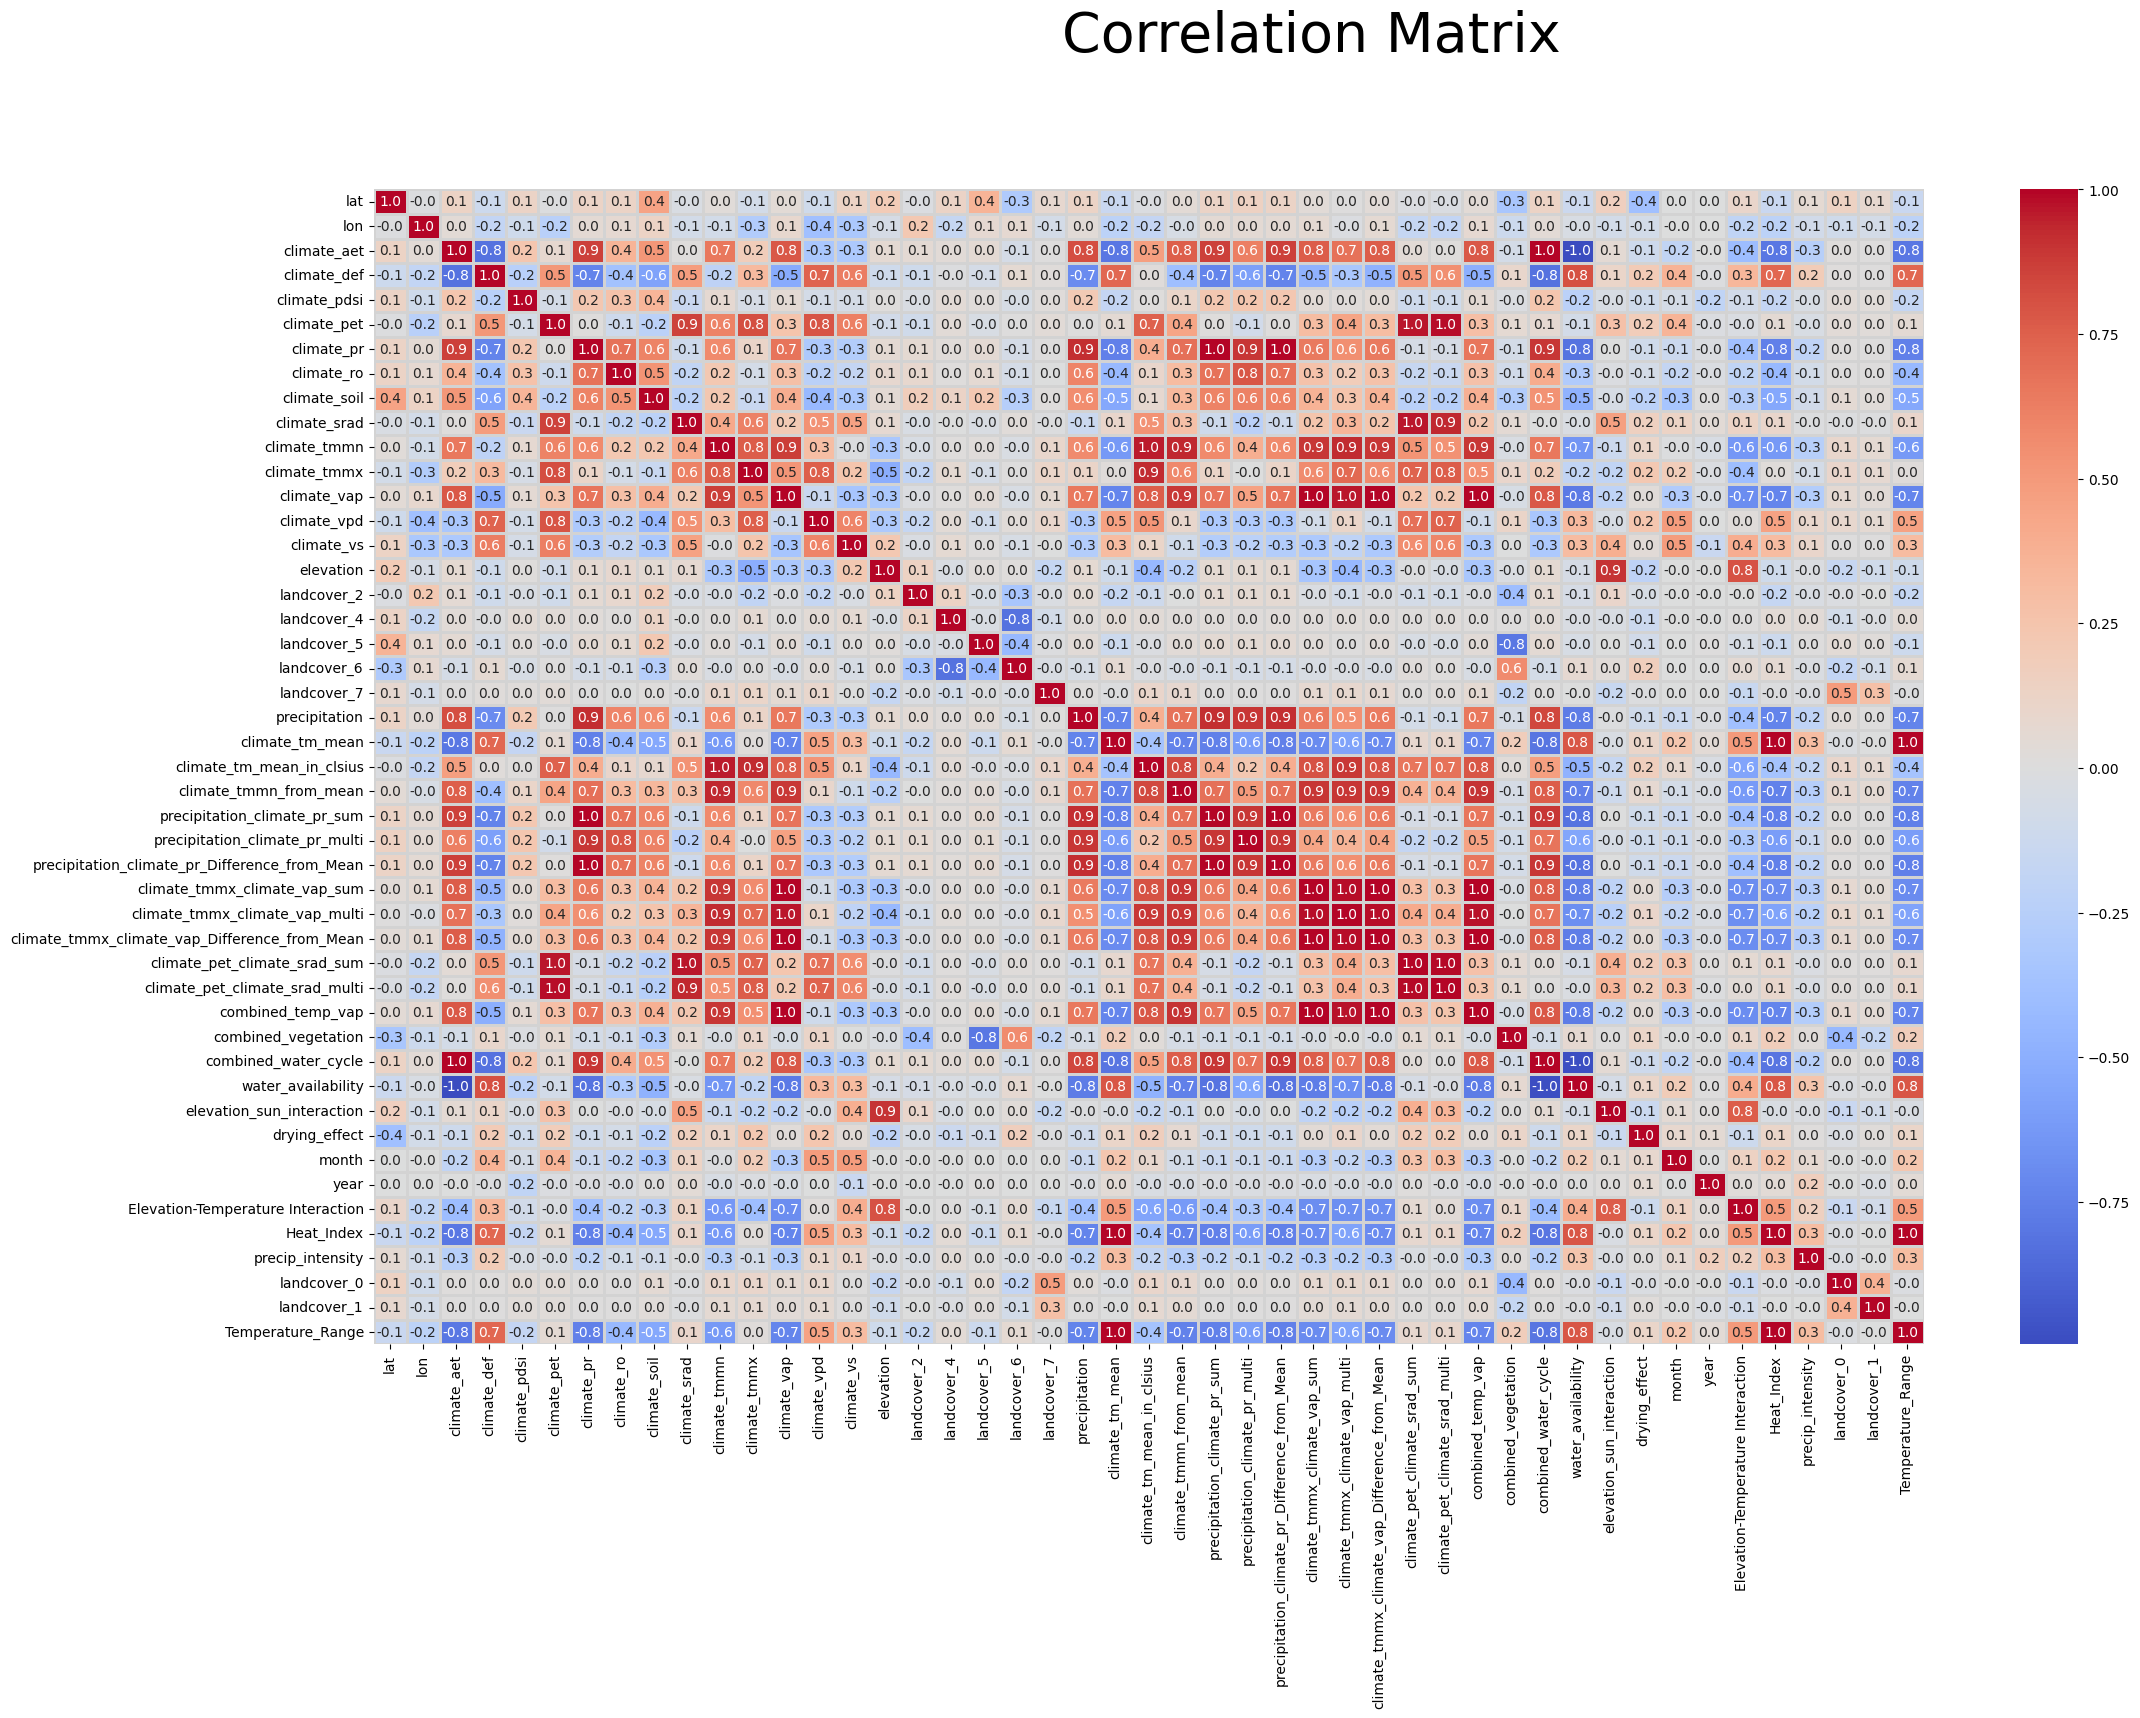

In [38]:
# Correlation matrix
plt.figure(figsize=(25, 15))
sns.heatmap(train[features].select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.1f', linewidths=2, linecolor='lightgrey')
plt.suptitle('Correlation Matrix', fontsize=40, y=1)
plt.show()

In [39]:
train[features].columns

Index(['lat', 'lon', 'climate_aet', 'climate_def', 'climate_pdsi',
       'climate_pet', 'climate_pr', 'climate_ro', 'climate_soil',
       'climate_srad', 'climate_tmmn', 'climate_tmmx', 'climate_vap',
       'climate_vpd', 'climate_vs', 'elevation', 'landcover_2', 'landcover_4',
       'landcover_5', 'landcover_6', 'landcover_7', 'precipitation',
       'climate_tm_mean', 'climate_tm_mean_in_clsius',
       'climate_tmmn_from_mean', 'precipitation_climate_pr_sum',
       'precipitation_climate_pr_multi',
       'precipitation_climate_pr_Difference_from_Mean',
       'climate_tmmx_climate_vap_sum', 'climate_tmmx_climate_vap_multi',
       'climate_tmmx_climate_vap_Difference_from_Mean',
       'climate_pet_climate_srad_sum', 'climate_pet_climate_srad_multi',
       'combined_temp_vap', 'combined_vegetation', 'combined_water_cycle',
       'water_availability', 'elevation_sun_interaction', 'drying_effect',
       'month', 'year', 'climate_pdsi_equal_zero',
       'Elevation-Temperature

In [40]:
def plot_feature_importances(model, model_name, color_scale='Reds', dataframe=None):

    if dataframe is None:
        raise ValueError("Dataframe cannot be None and must contain the feature names.")

    # Extracting feature importances and sorting them
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    feature_names = dataframe.columns

    # Creating a DataFrame for the importances
    feature_importances = pd.DataFrame({
        'Feature': feature_names[indices],
        'Importance': importances[indices]
    })

    # Plotting the feature importances
    fig = px.bar(feature_importances.sort_values('Importance', ascending=True),
                 x='Importance',
                 y='Feature',
                 title=f"Feature Importances in {model_name}",
                 labels={'Importance': 'Importance', 'Feature': 'Feature'},
                 height=1500,
                 color='Importance',
                 color_continuous_scale=color_scale)

    fig.update_layout(xaxis_title='Importance', yaxis_title='Feature')

    return fig
model_name = 'LightGBM'
fig = plot_feature_importances(model, model_name, 'Reds', X_train)
fig.show()

In [41]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
  X_train, X_val = X.iloc[train_index], X.iloc[val_index]
  y_train, y_val = y.iloc[train_index], y.iloc[val_index]

  model = LGBMRegressor(max_depth=10,learning_rate = 0.3,min_split_gain=0, min_child_weight=10,
                        min_child_samples=47,subsample =1,subsample_freq=0,reg_alpha=0.6,
                        reg_lambda=0.02,num_leaves=31)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_val)
  mse_score = mean_squared_error(y_val, y_pred, squared=False)
  mse_scores.append(mse_score)

  print(f"Fold {fold+1}: RMSE = {mse_score}")

average_mse = np.mean(mse_scores)
print(f"\nAverage RMSE across all folds: {average_mse}")



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10557
[LightGBM] [Info] Number of data points in the train set: 74833, number of used features: 47
[LightGBM] [Info] Start training from score 0.007758
Fold 1: RMSE = 0.019602530942560082
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.039574 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10560
[LightGBM] [Info] Number of data points in the train set: 74833, number of used features: 47
[LightGBM] [Info] Start training from score 0.007618
Fold 2: RMSE = 0.022822859663502202
[LightGBM] [Warnin

                                          Feature  Importance
15                                      elevation         172
1                                             lon         170
17                                    landcover_4         152
14                                     climate_vs         147
0                                             lat         128
4                                    climate_pdsi         127
42              Elevation-Temperature Interaction         124
19                                    landcover_6         117
3                                     climate_def         115
9                                    climate_srad         112
40                                           year         110
37                      elevation_sun_interaction         108
8                                    climate_soil         108
13                                    climate_vpd          95
21                                  precipitation          88
18      

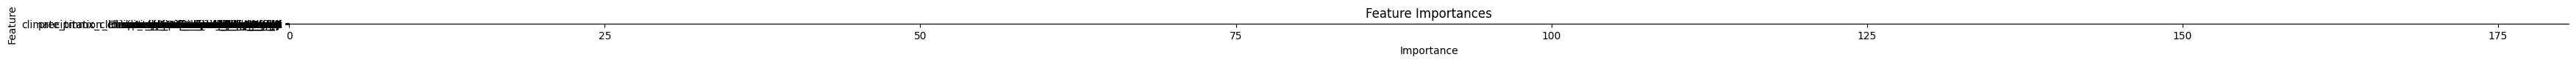

In [42]:
# show feature importances
importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Print or visualize feature importances
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(40, 0))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


In [43]:
# feature selection method
k_values = range(40, 47)

for k in k_values:
  selector = SelectKBest(f_regression, k=k)  # Select top 10 features
  X_train_selected = selector.fit_transform(X_train, y_train)
  X_test_selected = selector.transform(X_test)

  # Train model on selected features
  model_selected = LGBMRegressor(max_depth=10,learning_rate = 0.3,min_split_gain=0, min_child_weight=10, min_child_samples=47
                        ,subsample =1,subsample_freq=0,reg_alpha=0.6,reg_lambda=0.02,num_leaves=31)
  model_selected.fit(X_train_selected, y_train)

  # Make predictions
  y_pred_selected = model_selected.predict(X_test_selected)
  mse_selected = mean_squared_error(y_test, y_pred_selected)
  print("Mean Squared Error (with feature selection):", mse_selected**0.5)
  r2 = r2_score(y_test, y_pred_selected)
  print("R-squared Score:", r2)




[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008937 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9254
[LightGBM] [Info] Number of data points in the train set: 74834, number of used features: 40
[LightGBM] [Info] Start training from score 0.007596
Mean Squared Error (with feature selection): 0.016603375273230976
R-squared Score: 0.6603693170320102
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.039402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9481
[LightGBM] [Info] Number of data points in the train set: 74834, number of used features: 41
[LightGBM] [Info] Start training from score 0.007596
Mean Squared Error (with feature selection): 0.01689000238291903
R-squared Score: 0.6485418877207848
[LightGBM] [Info] Auto-choosing row-wise multi-th

In [44]:
# fit the model on X and y
model.fit(X,y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10571
[LightGBM] [Info] Number of data points in the train set: 83148, number of used features: 48
[LightGBM] [Info] Start training from score 0.007632


LGBMRegressor(learning_rate=0.3, max_depth=10, min_child_samples=47,
              min_child_weight=10, min_split_gain=0, reg_alpha=0.6,
              reg_lambda=0.02, subsample=1)

# First Predictions from LightGBM

In [45]:
# take the predictions
y_pred = model.predict(test[features])

In [46]:
# make a dict
submit = {
    'ID' : ss['ID'],
    'burn_area': y_pred
}
# convert the dict to a DataFrame
submit = pd.DataFrame(submit)

In [47]:
submit

,ID,burn_area
0,0_2014-01-01,-0.000466
1,1_2014-01-01,-0.000382
2,2_2014-01-01,-0.000484
3,3_2014-01-01,-0.000407
4,4_2014-01-01,-0.000111
...,...,...
25579,528_2017-12-01,0.003906
25580,529_2017-12-01,0.004287
25581,530_2017-12-01,0.001184
25582,531_2017-12-01,0.001528


# Perfoming another technique for our features using Winsorization Method

**TRYING ANOTHER TECHNIQUE**

In [48]:
train1 = pd.read_csv('https://raw.githubusercontent.com/Yousifshaheen/PlayData/main/Train.csv')
test1 = pd.read_csv('https://raw.githubusercontent.com/Yousifshaheen/PlayData/main/Test.csv')

In [49]:
train1.head()

,ID,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,...,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation
0,0_2001-01-01,-15.858835,29.237029,0.0,1195,0,263,1195,206,10,...,0.0,0.0,0.018654,0.0,0.714446,0.012174,0.244890,0.009836,0.0,0.256932
1,1_2001-01-01,-15.858835,29.487029,0.0,1196,0,232,1196,201,10,...,0.0,0.0,0.000000,0.0,0.654783,0.000095,0.345121,0.000000,0.0,0.273093
2,2_2001-01-01,-15.858835,29.737029,0.0,1190,0,314,1190,192,10,...,0.0,0.0,0.000000,0.0,0.516421,0.000000,0.483579,0.000000,0.0,0.285109
3,3_2001-01-01,-15.858835,29.987029,0.0,1144,0,321,1144,186,66,...,0.0,0.0,0.000000,0.0,0.299000,0.163902,0.537098,0.000000,0.0,0.298418
4,4_2001-01-01,-15.858835,30.237029,0.0,1187,0,413,1187,186,9,...,0.0,0.0,0.000000,0.0,0.277392,0.067742,0.654866,0.000000,0.0,0.315621


In [50]:
train_data_copy = train1.copy()

In [51]:
# Create a copy of the DataFrame to avoid modifying the original
train_data_copy = train1.copy()

# 1. Combined Temperature and Vapor Pressure
train_data_copy['combined_temp_vap'] = (train_data_copy['climate_tmmn'] + train_data_copy['climate_vap']) / 2


# 2. Combined Vegetation
train_data_copy['combined_vegetation'] = (train_data_copy['landcover_4'] + train_data_copy['landcover_6'])

# 3. Combined Water Cycle
train_data_copy['combined_water_cycle'] = (train_data_copy['climate_aet'] + train_data_copy['climate_pr'] + train_data_copy['precipitation']) / 3


# 4. Elevation-Sun Interaction
train_data_copy['elevation_sun_interaction'] = train_data_copy['elevation'] * train_data_copy['climate_srad']

# 5. VPD-Solar-Soil Interaction
train_data_copy['drying_effect'] = (train_data_copy['climate_vpd'] * train_data_copy['climate_srad']) / train_data_copy['climate_soil']

# 6. Temp-range
train_data_copy['temp_range'] = train_data_copy['climate_tmmx'] - train_data_copy['climate_tmmn']


# Display the first few rows of the modified DataFrame

print(train_data_copy.head())

             ID        lat        lon  burn_area  climate_aet  climate_def  \
0  0_2001-01-01 -15.858835  29.237029        0.0         1195            0   
1  1_2001-01-01 -15.858835  29.487029        0.0         1196            0   
2  2_2001-01-01 -15.858835  29.737029        0.0         1190            0   
3  3_2001-01-01 -15.858835  29.987029        0.0         1144            0   
4  4_2001-01-01 -15.858835  30.237029        0.0         1187            0   

   climate_pdsi  climate_pet  climate_pr  climate_ro  ...  landcover_6  \
0           263         1195         206          10  ...     0.244890   
1           232         1196         201          10  ...     0.345121   
2           314         1190         192          10  ...     0.483579   
3           321         1144         186          66  ...     0.537098   
4           413         1187         186           9  ...     0.654866   

   landcover_7  landcover_8  precipitation  combined_temp_vap  \
0     0.009836       

# Outlier Handling

In [52]:
# Function for Winsorization
def winsorize_series(series, lower_quantile=0.05, upper_quantile=0.95):
    lower_limit = series.quantile(lower_quantile)
    upper_limit = series.quantile(upper_quantile)
    return series.clip(lower=lower_limit, upper=upper_limit)

In [53]:
df_winsorized = train_data_copy.copy()

# List of features to winsorize
winsorize_outlier_features = ['climate_pr', 'climate_ro', 'climate_vpd', 'landcover_0', 'landcover_1', 'landcover_4', 'landcover_6', 'landcover_7', 'precipitation', 'climate_def', 'climate_pdsi', 'climate_pet', 'climate_srad', 'climate_tmmx', 'climate_vs', 'landcover_3' ]


# Apply winsorization to the selected features
for feature in winsorize_outlier_features:
    df_winsorized[feature] = winsorize_series(df_winsorized[feature])

# Display the rows of the modified DataFrame
df_winsorized.head()

,ID,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,...,landcover_6,landcover_7,landcover_8,precipitation,combined_temp_vap,combined_vegetation,combined_water_cycle,elevation_sun_interaction,drying_effect,temp_range
0,0_2001-01-01,-15.858835,29.237029,0.0,1195,0,263,1195,203,10,...,0.292224,0.001537,0.0,0.256932,1352.0,0.959336,467.085644,7.694765e+05,122.086879,106
1,1_2001-01-01,-15.858835,29.487029,0.0,1196,0,232,1196,201,10,...,0.345121,0.000000,0.0,0.273093,1354.0,0.999905,465.757698,8.010075e+05,112.481980,107
2,2_2001-01-01,-15.858835,29.737029,0.0,1190,0,314,1190,192,10,...,0.483579,0.000000,0.0,0.285109,1347.0,1.000000,460.761703,8.881556e+05,120.959451,109
3,3_2001-01-01,-15.858835,29.987029,0.0,1144,0,321,1144,186,16,...,0.537098,0.000000,0.0,0.292240,1264.5,0.836098,443.432806,1.204869e+06,172.169651,107
4,4_2001-01-01,-15.858835,30.237029,0.0,1187,0,413,1187,186,9,...,0.654866,0.000000,0.0,0.292240,1315.0,0.932258,457.771874,1.078495e+06,117.775963,110


In [54]:
# Calculate IQR for numerical columns after Winsorization
Q1_win = df_winsorized.select_dtypes(include=['float64', 'int64']).quantile(0.25)
Q3_win = df_winsorized.select_dtypes(include=['float64', 'int64']).quantile(0.75)
IQR_win = Q3_win - Q1_win

# Define outlier boundaries
lower_bound_win = Q1_win - 1.5 * IQR_win
upper_bound_win = Q3_win + 1.5 * IQR_win

# Identify outliers
outliers_win = ((df_winsorized.select_dtypes(include=['float64', 'int64']) < lower_bound_win) | (df_winsorized.select_dtypes(include=['float64', 'int64']) > upper_bound_win)).sum()

# Outlier Summary for each feature after Winsorization
outliers_win_df = pd.DataFrame({
    'Feature': outliers_win.index,
    'Number of Outliers': outliers_win.values,
    'Percentage of Outliers': (outliers_win.values / len(df_winsorized)) * 100
})

print(outliers_win_df)

                      Feature  Number of Outliers  Percentage of Outliers
0                         lat                   0                0.000000
1                         lon                   0                0.000000
2                   burn_area               19423               23.359552
3                 climate_aet                   0                0.000000
4                 climate_def                   0                0.000000
5                climate_pdsi                   0                0.000000
6                 climate_pet                   0                0.000000
7                  climate_pr                   0                0.000000
8                  climate_ro                5511                6.627941
9                climate_soil               10909               13.119979
10               climate_srad                   0                0.000000
11                climate_swe                   0                0.000000
12               climate_tmmn         

# Splitting data to X_train and Y_train ready to be fitted to the model

In [55]:
# Prepare the target variable
df_winsorized['log_burn_area'] = np.log1p(df_winsorized['burn_area'])


In [56]:
# Split the winsorized dataset into training and validation sets
X_win = df_winsorized.drop(['burn_area','climate_tmmn', 'climate_tmmx', 'climate_vap','climate_aet' ,'landcover_0', 'landcover_7', 'landcover_1','landcover_4','climate_srad' ,'climate_pr','precipitation' ,'climate_vpd', 'elevation' ,'climate_swe', 'landcover_3','climate_ro','log_burn_area'], axis=1)
y_win = df_winsorized['log_burn_area']
X_train_win, X_val_win, y_train_win, y_val_win = train_test_split(X_win, y_win, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train_win.shape)
print("X_val shape:", X_val_win.shape)
print("y_train shape:", y_train_win.shape)
print("y_val shape:", y_val_win.shape)

X_train shape: (66518, 18)
X_val shape: (16630, 18)
y_train shape: (66518,)
y_val shape: (16630,)


In [57]:
X_train_win.head()

,ID,lat,lon,climate_def,climate_pdsi,climate_pet,climate_soil,climate_vs,landcover_2,landcover_5,landcover_6,landcover_8,combined_temp_vap,combined_vegetation,combined_water_cycle,elevation_sun_interaction,drying_effect,temp_range
47723,286_2008-06-01,-19.108835,30.487029,803,-252,842,109,176,0.0,0.000000,0.972819,0.0,493.5,1.000000,6.666686,2.558578e+06,1552.513761,161
75232,79_2012-10-01,-17.108835,31.987029,1634,133,1780,161,277,0.0,0.113744,0.807568,0.0,864.5,0.886256,53.002256,2.392604e+06,2845.652174,148
49537,501_2008-09-01,-21.608835,29.487029,1557,-207,1570,7,238,0.0,0.000000,0.978576,0.0,710.5,1.000000,4.667695,1.739619e+06,67808.571429,167
45442,137_2008-02-01,-17.858835,28.987029,351,370,1380,841,166,0.0,0.001844,0.973614,0.0,1181.0,0.998156,358.029232,2.521479e+06,324.494649,126
54640,274_2009-07-01,-19.108835,27.487029,1056,-9,1064,90,241,0.0,0.000000,0.845865,0.0,423.0,1.000000,2.668507,2.015774e+06,2559.700000,200


In [58]:
y_train_win.head()

,log_burn_area
47723,0.004294
75232,0.013521
49537,0.007040
45442,0.000000
54640,0.000000


In [59]:
# 1. Winsorized Dataset
scaler_win = RobustScaler()
# Drop non-numeric columns before scaling
X_train_win_numeric = X_train_win.select_dtypes(include=['number'])
X_val_win_numeric = X_val_win.select_dtypes(include=['number'])
X_train_win_scaled = scaler_win.fit_transform(X_train_win_numeric)
X_val_win_scaled = scaler_win.transform(X_val_win_numeric)


# Model Selection: LightGBM

In [60]:
# Define the models
models = {
    "LightGBM": LGBMRegressor(),
}

# Model Training for the second approach

In [61]:
# Initialize a list to store results
results = []

# Train and evaluate models on the Winsorized data (random split)
for name, model in models.items():
    # Train the model
    model.fit(X_train_win_scaled, y_train_win)

    # Predict on the validation set
    y_pred_win = model.predict(X_val_win_scaled)

    # Calculate evaluation metrics
    mse_win = mean_squared_error(y_val_win, y_pred_win)
    rmse_win = np.sqrt(mse_win)
    r2_win = r2_score(y_val_win, y_pred_win)

    # Store the results
    results.append({
        "Model": name,
        "Split Method": "Random Split",
        "MSE": mse_win,
        "RMSE": rmse_win,
        "R-squared": r2_win,
        "R-squared %": r2_win * 100,
    })


# Convert the results into a DataFrame for easy comparison
results_df = pd.DataFrame(results)

# Display the results DataFrame
print(results_df)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021662 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3557
[LightGBM] [Info] Number of data points in the train set: 66518, number of used features: 17
[LightGBM] [Info] Start training from score 0.007353
      Model  Split Method       MSE      RMSE  R-squared  R-squared %
0  LightGBM  Random Split  0.000362  0.019028   0.446022    44.602244


In [62]:
test1.shape


(25584, 28)

In [63]:
test_data=test1.copy()
test_data

,ID,lat,lon,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,...,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation
0,0_2014-01-01,-15.858835,29.237029,1146,74,-451,1220,120,6,212,...,0.0,0.000615,0.015418,0.0,0.416704,0.023724,0.530016,0.013524,0.0,0.404243
1,1_2014-01-01,-15.858835,29.487029,1118,98,-405,1216,117,6,330,...,0.0,0.000000,0.000000,0.0,0.406436,0.000446,0.593118,0.000000,0.0,0.421489
2,2_2014-01-01,-15.858835,29.737029,1067,137,-468,1204,111,6,194,...,0.0,0.000000,0.000000,0.0,0.254791,0.000000,0.745209,0.000000,0.0,0.419122
3,3_2014-01-01,-15.858835,29.987029,969,187,-533,1156,101,5,78,...,0.0,0.000000,0.000000,0.0,0.219340,0.182153,0.598507,0.000000,0.0,0.404596
4,4_2014-01-01,-15.858835,30.237029,927,270,-505,1197,96,5,139,...,0.0,0.000000,0.000000,0.0,0.220239,0.097748,0.682013,0.000000,0.0,0.371100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25579,528_2017-12-01,-22.108835,30.737029,802,1030,168,1832,84,4,81,...,0.0,0.000000,0.000000,0.0,0.029888,0.000000,0.970112,0.000000,0.0,0.049016
25580,529_2017-12-01,-22.108835,30.987029,819,971,169,1790,85,4,81,...,0.0,0.000000,0.000000,0.0,0.396455,0.000000,0.603545,0.000000,0.0,0.041220
25581,530_2017-12-01,-22.108835,31.237029,756,1076,156,1833,79,4,88,...,0.0,0.000000,0.000000,0.0,0.455142,0.000000,0.544858,0.000000,0.0,0.031323
25582,531_2017-12-01,-22.108835,31.487029,749,1071,178,1820,78,4,102,...,0.0,0.000000,0.000000,0.0,0.680874,0.000000,0.319126,0.000000,0.0,0.032025


Winsorised - Random Split

In [64]:
# Prepare Test Data (Winsorized)
test_data_win = test_data.copy()

# Combine features
test_data_win['combined_temp_vap'] = (test_data_win['climate_tmmn'] + test_data_win['climate_vap']) / 2
test_data_win['combined_vegetation'] = (test_data_win['landcover_4'] + test_data_win['landcover_6']) / 2
test_data_win['combined_water_cycle'] = (test_data_win['climate_aet'] + test_data_win['climate_pr'] + test_data_win['precipitation']) / 3
test_data_win['elevation_sun_interaction'] = test_data_win['elevation'] * test_data_win['climate_srad']
test_data_win['drying_effect'] = (test_data_win['climate_vpd'] * test_data_win['climate_srad']) / test_data_win['climate_soil']
test_data_win['temp_range'] = train_data_copy['climate_tmmx'] - train_data_copy['climate_tmmn']

test_data_win = test_data_win.drop(['climate_tmmn', 'climate_tmmx', 'climate_vap','climate_aet' ,'landcover_0', 'landcover_7', 'landcover_1','landcover_4','climate_srad' ,'climate_pr','precipitation' ,'climate_vpd', 'elevation' ,'climate_swe', 'landcover_3','climate_ro' ], axis=1)
test_data_win.head()


,ID,lat,lon,climate_def,climate_pdsi,climate_pet,climate_soil,climate_vs,landcover_2,landcover_5,landcover_6,landcover_8,combined_temp_vap,combined_vegetation,combined_water_cycle,elevation_sun_interaction,drying_effect,temp_range
0,0_2014-01-01,-15.858835,29.237029,74,-451,1220,212,148,0.015418,0.023724,0.530016,0.0,1349.0,0.473360,422.134748,8.161992e+05,921.820755,106
1,1_2014-01-01,-15.858835,29.487029,98,-405,1216,330,143,0.000000,0.000446,0.593118,0.0,1348.5,0.499777,411.807163,8.464852e+05,597.878788,107
2,2_2014-01-01,-15.858835,29.737029,137,-468,1204,194,143,0.000000,0.000000,0.745209,0.0,1339.5,0.500000,392.806374,9.344485e+05,979.000000,109
3,3_2014-01-01,-15.858835,29.987029,187,-533,1156,78,122,0.000000,0.182153,0.598507,0.0,1259.5,0.408923,356.801532,1.263043e+06,2204.512821,107
4,4_2014-01-01,-15.858835,30.237029,270,-505,1197,139,143,0.000000,0.097748,0.682013,0.0,1311.0,0.451126,341.123700,1.129158e+06,1381.014388,110


In [65]:
test_data_win.shape

(25584, 18)

Test data Scaling

In [66]:
# Scale the test data
X_test_win_numeric = test_data_win.select_dtypes(include=['number'])
X_test_win_scaled = scaler_win.transform(X_test_win_numeric)

# Second Model Predictions

In [67]:
# Choose the second best performing model LightGBM
best_model2 = LGBMRegressor()
best_model2.fit(X_train_win_scaled, y_train_win)

# Make predictions on the test data
y_pred_test_win = best_model2.predict(X_test_win_scaled)

# Since the target variable was log-transformed, inverse the transformation to get predictions in original scale
y_pred_test_original_scale = np.expm1(y_pred_test_win)


# Create a submission DataFrame
submission_df_2 = pd.DataFrame({
    'ID': test_data['ID'],
    'burn_area': y_pred_test_original_scale
})

print(submission_df_2)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3557
[LightGBM] [Info] Number of data points in the train set: 66518, number of used features: 17
[LightGBM] [Info] Start training from score 0.007353
                   ID  burn_area
0        0_2014-01-01   0.000784
1        1_2014-01-01   0.000229
2        2_2014-01-01   0.000878
3        3_2014-01-01   0.000888
4        4_2014-01-01   0.000731
...               ...        ...
25579  528_2017-12-01   0.000616
25580  529_2017-12-01   0.000969
25581  530_2017-12-01   0.002483
25582  531_2017-12-01   0.003128
25583  532_2017-12-01   0.001826

[25584 rows x 2 columns]


# Finding the Average of the predictions from two models to have mean predictions

In [68]:
submit['burn_area'] = (submit['burn_area'] + submission_df_2['burn_area'])/2

# Downloading our findings and uploading them to Zindi Platform

In [69]:
from google.colab import files


submit.to_csv('submission.csv', index=False)


files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>